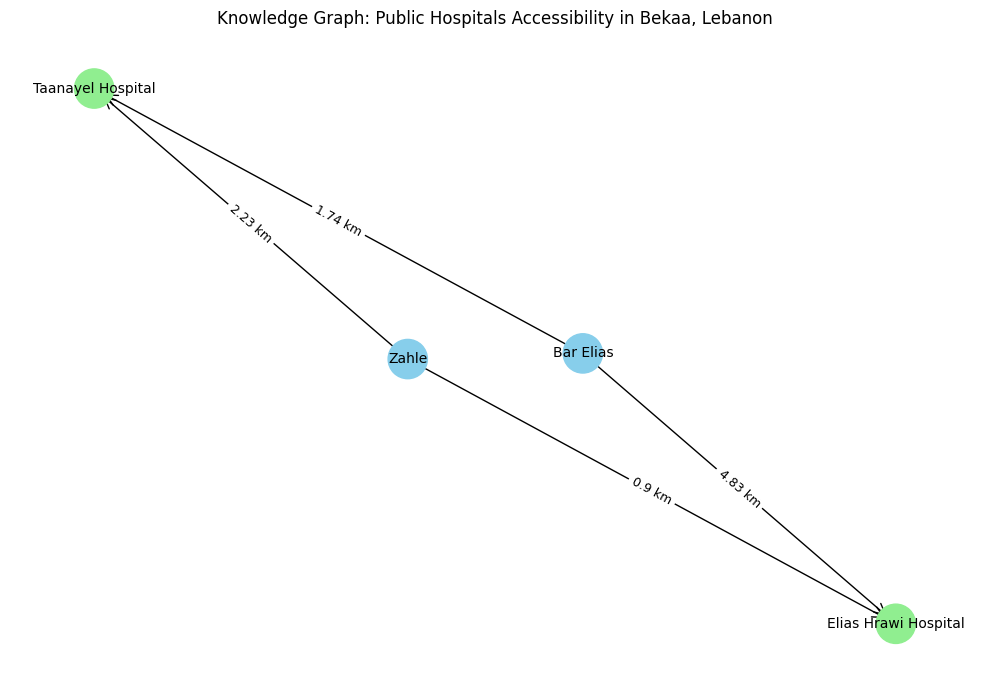

In [ ]:
# Knowledge Graph for Public Hospitals Accessibility in Bekaa, Lebanon
# This script:
# 1. Loads hospital and city/village data.
# 2. Calculates distances between each city and each hospital.
# 3. Builds a knowledge graph using NetworkX for illustration.
# 4. Visualizes the graph with distances on edges.

import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Load Data
# ----------------------------

# Example DataFrames (replace with your CSV imports)
hospitals_data = pd.DataFrame({
    'hospital_id': ['H1', 'H2'],
    'name': ['Elias Hrawi Hospital', 'Taanayel Hospital'],
    'latitude': [33.8547, 33.8265],
    'longitude': [35.9020, 35.9024]
})

cities_data = pd.DataFrame({
    'city_id': ['C1', 'C2'],
    'name': ['Zahle', 'Bar Elias'],
    'latitude': [33.8466, 33.8113],
    'longitude': [35.9020, 35.8976]
})

# ----------------------------
# Step 2: Calculate Distances
# ----------------------------

distances = []
for _, city in cities_data.iterrows():
    for _, hospital in hospitals_data.iterrows():
        city_coord = (city['latitude'], city['longitude'])
        hospital_coord = (hospital['latitude'], hospital['longitude'])
        distance_km = geodesic(city_coord, hospital_coord).km
        distances.append({
            'city_id': city['city_id'],
            'hospital_id': hospital['hospital_id'],
            'distance_km': distance_km
        })

distances_df = pd.DataFrame(distances)

# ----------------------------
# Step 3: Build Knowledge Graph with NetworkX
# ----------------------------

G = nx.DiGraph()

# Add city nodes
for _, row in cities_data.iterrows():
    G.add_node(row['city_id'], label=row['name'], type='City')

# Add hospital nodes
for _, row in hospitals_data.iterrows():
    G.add_node(row['hospital_id'], label=row['name'], type='Hospital')

# Add edges with distances
for _, row in distances_df.iterrows():
    G.add_edge(row['city_id'], row['hospital_id'], distance_km=round(row['distance_km'], 2))

# ----------------------------
# Step 4: Visualize Knowledge Graph
# ----------------------------

pos = nx.spring_layout(G, seed=42)
labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'distance_km')

plt.figure(figsize=(10, 7))

# Draw nodes
node_colors = ['skyblue' if G.nodes[n]['type'] == 'City' else 'lightgreen' for n in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d} km" for (u, v), d in edge_labels.items()}, font_size=9)

plt.title("Knowledge Graph: Public Hospitals Accessibility in Bekaa, Lebanon")
plt.axis('off')
plt.tight_layout()
plt.show()
